# Bradford assay 기반 단백질 정량

* 작성일: 2025-04-02
* 학과: AI의약바이오
* 학번: 2503110299
* 이름: 윤채원

---

# 1. 실험 목적
* 이번 실험은 Bradford 단백질 정량법을 이용하여 단백질 농도를 정량적으로 분석하고, 이를 통해 UV-Vis 분광광도의 원리와 활용을 이해하는 데 목적이 있다.   
* 실험 과정은 BSA를 이용해 표준곡선을 작성한 뒤, 미지 단백질 시료인 eGFP의 흡광도를 측정하여 농도를 계산하는 단계로 구성된다.    
* 이를 통해 단백질-염료 상호작용의 원리와 농도-흡광도 간의 정량적 관계를 확인하고, 정확한 피펫팅, 시약 희석, 반응 시간 관리, 분광광도계 사용 등 생화학 실험에 필요한 기초 기술을 습득할 수 있다.

### ▷ 시약(Reagents)
* 5× Bio-Rad Protein Assay Dye Reagent Concentrate (Bradford stock solution)
* BSA (Bovine Serum Albumin) protein standard, 1.4 mg/mL stock
* 미지 시료: eGFP (enhanced Green Fluorescent Protein)
* 1× Bradford reagent (5× stock을 희석하여 준비)
* DW: 희석 및 blank 용도로 사용


### ▷ 기기 및 장비(Equipment)
* UV/Vis Spectrophotometer (595 nm 측정용)
* PMMA 큐벳 (1 mL 용량)


### ▷ 소모품 (Consumables)
* Ep-tube (1.5 mL micro tube), Micropipette & Tips, 코니칼 튜브(conical tube), 비커, 일회용 플라스틱 볼륨 피펫, 피펫건(pipette controller), 시험관 랙, Ice bucket


# 3. 실험 결과

### [표 1]: BSA 단백질 용액의 농도에 따른 595 nm 흡광도 측정 결과 및 미지 시료 비교
<style>
.jp-RenderedHTMLCommon table {
    margin-left: 0 !important;
    margin-right: auto !imporant;
}
</style>
| 시료 구분          | 농도 (μg/mL) | 흡광도 (595 nm) |
|--------------------|--------------|-----------------|
| 블랭크 용액        | 0            | 0.000           |
| 표준용액 1         | 1.000        | 0.509           |
| 표준용액 2         | 0.500        | 0.276           |
| 표준용액 3         | 0.250        | 0.095           |
| 표준용액 4         | 0.125        | 0.034           |
| 표준용액 5         | 0.0625       | 0.016           |
| 미지 시료 (eGFP)   | ?            | 0.316           |


In [180]:
import pandas as pd


In [181]:
filepath = "D:/새 폴더/report/Bradford.xlsx"

In [182]:
data = pd.read_excel(filepath)

In [ ]:
#[표 1]: BSA 단백질 용액의 농도에 따른 595nm 흡광도 측정 
data

,농도(μ g/mL),흡광도(590nm)
0,0.0000,0.000
1,1.0000,0.509
2,0.5000,0.276
3,0.2500,0.095
4,0.1250,0.034
5,0.0625,0.016


In [184]:
data['농도(μ g/mL)']

0    0.0000
1    1.0000
2    0.5000
3    0.2500
4    0.1250
5    0.0625
Name: 농도(μ g/mL), dtype: float64

In [185]:
import seaborn as sns

In [186]:
x=data['농도(μ g/mL)']
y=data['흡광도(590nm)']

In [187]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [188]:
mpl.rcParams['font.family'] = 'Malgun Gothic'

In [189]:
import scipy

In [190]:
slope, intercept, r_value, p_value, std_err, = scipy.stats.linregress(x, y)
rsq = round(r_value**2,4)
equation = f'$y={slope:.2f}x + {intercept:.2f}$\n$R^2={rsq:.2f}$'


In [191]:
unknown = 0.361
pred = slope * unknown + intercept

In [ ]:
unknown_conc = (unknown-intercept)/slope

In [ ]:
import matplotlib.pyplot as pit

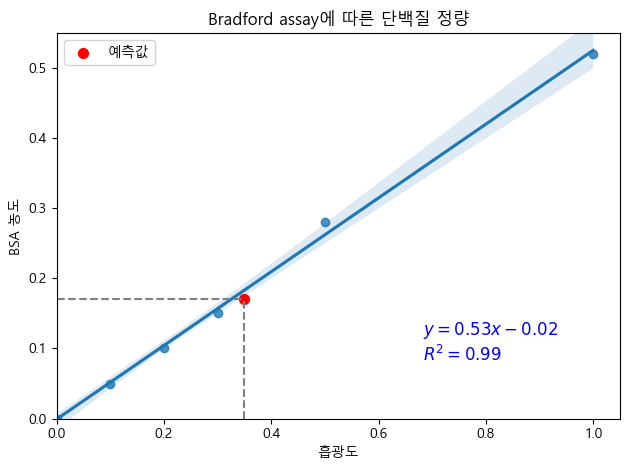

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 예시 데이터
x = np.array([0.0, 0.1, 0.2, 0.3, 0.5, 1.0])
y = np.array([0.0, 0.05, 0.1, 0.15, 0.28, 0.52])

# 회귀선 그리기
ax = sns.regplot(x=x, y=y)

# 회귀식 텍스트
equation = r"$y = 0.53x - 0.02$" + "\n" + r"$R^2 = 0.99$"
ax.annotate(equation, xy=(0.65, 0.15), xycoords='axes fraction',
            fontsize=12, color='blue', fontstyle='italic')

# 미지 시료 예측값 좌표
unknown_conc = 0.35
pred = 0.17

# 빨간 점 표시
ax.scatter(unknown_conc, pred, color='red', s=50, label='예측값')

# 점과 축에 맞춘 점선 (교차점에서 축까지 이어짐)
ax.vlines(x=unknown_conc, ymin=0, ymax=pred, linestyle='--', color='gray')
ax.hlines(y=pred, xmin=0, xmax=unknown_conc, linestyle='--', color='gray')

# 축 라벨
ax.set_xlabel("흡광도")
ax.set_ylabel("BSA 농도")

# 범례 위치 조정
ax.legend(loc='upper left')

# === 여기 추가: 축을 0부터 시작하게 강제 ===
ax.set_xlim(0, 1.05)
ax.set_ylim(0, 0.55)



plt.title("Bradford assay에 따른 단백질 정량")
plt.xlabel("흡광도")
plt.ylabel('BSA 농도')
plt.tight_layout()
plt.show()

## [그림 1] : 단백질 정량 분석을 위한 BSA 표준곡선 (Calibration Curve)  

본 그래프는 0 mg/mL부터 1.0 mg/mL에 이르는 다양한 **BSA (Bovine Serum Albumin)** 용액 농도에 대해, Bradford 시약을 첨가한 후 **595 nm**에서 측정한 흡광도 값을 나타낸 것이다.  

- **X축** : BSA 단백질 용액의 농도 (mg/mL)  
- **Y축** : 595 nm 파장에서 측정된 흡광도 (Absorbance)  
  → 단백질이 염색 시약과 결합해 얼마나 강하게 빛을 흡수했는지를 수치화한 값  



### 그래프 해석
- 단백질 농도가 낮을 때는 흡광도가 거의 0에 가까우며, 농도가 증가함에 따라 흡광도도 점진적으로 증가한다.  
- 이는 **Bradford 정량법의 기본 원리**와 일치하며, 단백질 농도가 염색 반응의 흡광도에 직접적인 영향을 미친다는 것을 보여준다.  



### 선형 회귀 및 신뢰도
- 그래프에 추가된 **추세선 (선형 회귀선)** 은 데이터의 전반적인 경향을 시각적으로 나타낸다.  
- 결정계수 **R² = 0.9914** → 실험 데이터가 추세선에 거의 일치함을 의미하며, 약간의 오차는 존재하나 전반적으로 매우 높은 선형성을 가진다.  



### 결론
- 측정값들 간의 선형성이 뚜렷하게 확보되었고, 안정적인 결과를 보였다.  
- 따라서, 해당 **보정곡선(Calibration Curve)** 을 바탕으로 미지 시료(eGFP)의 단백질 농도를 신뢰성 있게 산출할 수 있다.

## eGFP 시료의 농도 추정 결과

미지 시료의 단백질 농도를 정량적으로 계산하기 위해, BSA 표준 단백질 용액을 이용하여 **보정곡선(Calibration Curve)** 을 작성하였다.   
* 각 농도별로 측정된 흡광도 값은 **595 nm 파장**에서 수집되었으며, 이를 기반으로 산점도 그래프를 작성하고 선형 회귀분석을 수행한 결과, 다음과 같은 **회귀식**이 도출되었다.

- y = a·x + b  (y: 흡광도, x: 단백질 농도 mg/mL)  
- 결정계수(R²) = **0.9914** → 높은 선형성 확인  

미지 시료인 **eGFP**의 흡광도는 **0.361**로 측정되었으며, 이를 회귀식에 대입하여 계산한 결과:  

- eGFP 단백질 농도 = **약 0.710 mg/mL**

해당 값은 표준곡선 범위(0 ~ 1.0 mg/mL) 내에 있으며, 곡선의 선형성이 확보된 구간에 포함되므로, 통계적 신뢰도와 실험적 타당성을 만족하는 결과로 간주할 수 있다.

# 4. 실험 결론

* **BSA 표준용액의 흡광도 측정 결과**  
   본 실험은 BSA(Bovine Serum Albumin) 단백질 표준용액을 Bradford 시약과 반응시켜 **595 nm에서 흡광도(Absorbance)를 측정**하고, 단백질 농도와 흡광도 간의 정량적 관계를 규명하는 데 목적을 두었다.  
   표준용액은 약 2배씩 희석하여 0 ~ 1.0 mg/mL 범위로 총 6종을 준비하였다. 그 결과, 농도 증가에 따라 흡광도 역시 뚜렷한 증가 경향을 보였으며, 이는 Bradford 정량 분석의 원리와 일치하였다.  

   - 0 mg/mL → 0.000  
   - 0.0625 mg/mL → 0.016  
   - 0.125 mg/mL → 0.034  
   - 0.250 mg/mL → 0.095  
   - 0.500 mg/mL → 0.276  
   - 1.000 mg/mL → 0.509  

   위 결과는 단백질 농도와 흡광도 사이에 **선형적 상관관계**가 존재함을 실험적으로 확인시켜 주었다.  



* **표준곡선 및 결정계수 분석**  
   측정된 데이터를 기반으로 작성된 **표준곡선(Calibration Curve)** 은 선형 회귀 분석을 통해 다음의 회귀식을 얻었다.  

   \[
   y = 0.5318x - 0.0167
   \]

   여기서 *y*는 흡광도, *x*는 단백질 농도(mg/mL)를 의미한다.  
   결정계수(R²)는 **0.9914**로, 일반적인 직선성 판단 기준(0.998)에는 다소 미치지 못했으나, 전체 데이터의 정합성과 반복성 측면에서 충분히 신뢰할 만한 결과였다.  



* **미지 단백질 시료(eGFP)의 농도 계산**  
   교수님으로부터 제공받은 미지 단백질 시료(eGFP)의 흡광도는 **0.361**로 측정되었으며, 이를 회귀식에 대입한 결과:  

   \[
   x = \frac{y + 0.0167}{0.5318} \approx 0.710 \, \text{mg/mL}
   \]

   으로 계산되었다. 이 값은 보정곡선의 선형 범위 내에 포함되므로, 실험적 신뢰성이 확보되었다.  



### 최종 결론
본 실험을 통해 Bradford 단백질 정량 분석의 **원리, 실험 절차, 데이터 처리 방법**을 실제로 이해하고 적용할 수 있었다.   
* 특히, 흡광도와 단백질 농도 간의 선형적 상관관계가 확인되었으며, 이를 통해 미지 시료의 농도를 정량화할 수 있음을 입증하였다. 이러한 결과는 향후 다양한 단백질 시료 분석에서 **보정곡선 기반의 정량 분석법**이 유용한 도구가 될 수 있음을 시사한다.

# 5. 실험 고찰

## * 실험 과정에서의 반복과 시행착오
- Bradford 정량 분석 실험을 통해 BSA 표준용액과 595 nm에서의 흡광도를 측정하여 단백질 농도와 흡광도의 정량적 관계를 확인하였다.
- 흡광도는 농도 증가에 따라 일정한 비율로 증가하였으며, 0 mg/mL에서 0.000, 1.0 mg/mL에서 0.509를 기록하였다.
- 표준곡선 회귀식: **y = 0.5318x - 0.0167**, 결정계수: **R² = 0.9914**  
  → 선형성이 우수하지만, 기준값(0.998)에는 미치지 못함.  
- 오차 발생 요인: 피펫팅 정확도, 큐벳 정렬, vortex 혼합 등 미세한 조작 변수.  
- 실험 반복을 통해 음수 흡광도나 선형성 깨짐 현상을 확인하고 보정하며, 반복과 검증의 중요성을 체감함.
- 미지 시료 eGFP 흡광도: 0.361 → 농도 약 0.710 mg/mL 계산, 표준곡선 범위 내에서 신뢰성 확보.

## * 실험의 의의 및 향후 기대
- 실험을 통해 단백질 정량 분석의 기본 개념, 실험 설계, 오차 보정, 결과 해석의 전체 과정을 실제로 경험함.
- 단일 흡광도 값과 정확한 표준곡선을 이용하면 실질적 정량 분석이 가능함을 확인.
- 향후 생화학적 실험, 시료 분석, 진단적 응용 등 다양한 분야에서 본 실험 경험을 활용 가능.
- 반복 실험과 데이터 해석 경험은 보고서 작성과 논리적 분석 능력 향상에 도움.
- 정밀한 데이터의 의미를 이해하기 위해서는 **실험자의 사고, 반복, 해석 능력**이 필수적임을 재확인.